In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [20]:
sales_data=pd.read_csv(r"C:\Users\Namra\Data Science and AI\Assignments\Capstone Project(Walmart)\Walmart DataSet.csv")

In [21]:
sales_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


# a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?


In [22]:
# Calculate correlation between weekly sales and unemployment rate
correlation = sales_data['Weekly_Sales'].corr(sales_data['Unemployment'])
correlation

-0.10617608965795419

In [23]:
# If correlation is negative and significant, it indicates a relationship
if correlation < -0.5:  # You can adjust the threshold as needed
    # Group data by store and calculate average weekly sales and unemployment rate
    store_data = sales_data.groupby('Store')[['Weekly_Sales', 'Unemployment']].mean()

    # Sort stores by average weekly sales in ascending order (lowest sales first)
    suffering_stores = store_data.sort_values(by=['Weekly_Sales']).head(10)

    print("\nStores Suffering the Most (Lowest Average Weekly Sales):")
    print(suffering_stores)
else:
    print("No significant correlation found between weekly sales and unemployment rate.")

No significant correlation found between weekly sales and unemployment rate.


# b. If the weekly sales show a seasonal trend, when and what could be the reason?

In [24]:
# The format was incorrect, it should be '%d-%m-%Y' for 'day-month-year'
sales_data['Date'] = pd.to_datetime(sales_data['Date'], format='%d-%m-%Y')

In [25]:
# Here, we sum 'Weekly_Sales' for duplicate dates, adjust for other columns as needed
sales_data = sales_data.groupby('Date')['Weekly_Sales'].sum().reset_index()

In [26]:
# Now set 'Date' as index and resample
sales_data = sales_data.set_index('Date').resample('W').ffill()

In [27]:
# Decompose the time series into trend, seasonality, and residual
decomposition = sm.tsa.seasonal_decompose(sales_data['Weekly_Sales'], model='additive')

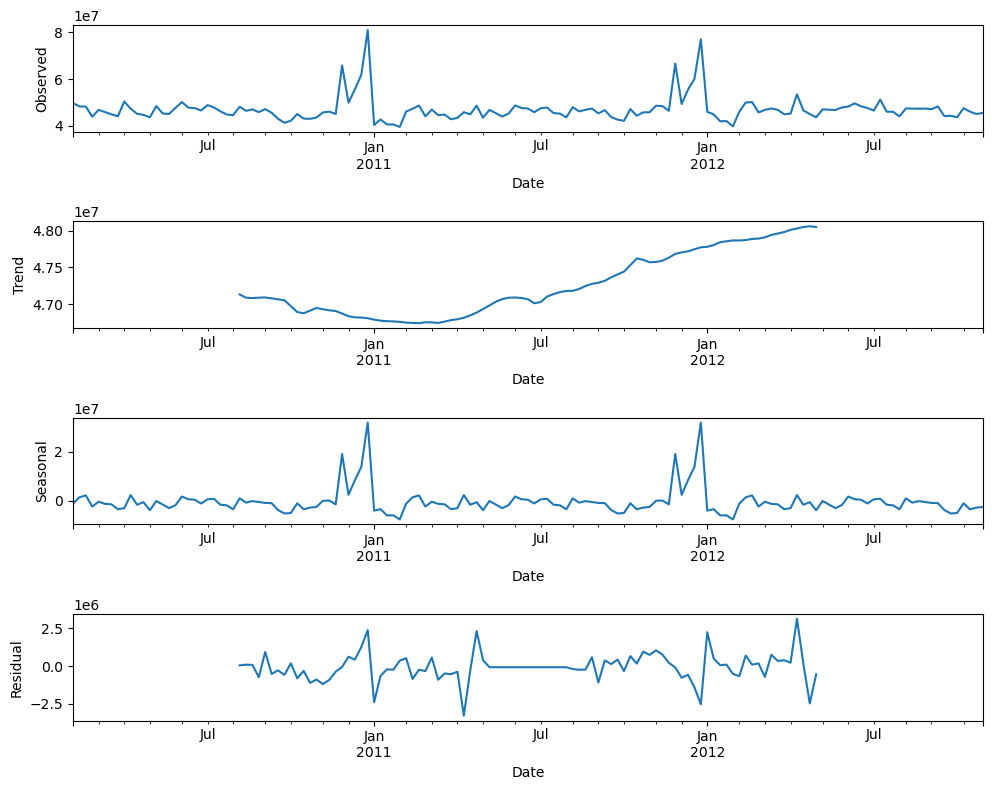

In [28]:
# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8)) # Corrected line
decomposition.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
decomposition.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
decomposition.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
decomposition.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.tight_layout()
plt.show()

# c. Does temperature affect the weekly sales in any manner?

In [31]:
sales_data=pd.read_csv(r"C:\Users\Namra\Data Science and AI\Assignments\Capstone Project(Walmart)\Walmart DataSet.csv")

In [32]:
# Convert 'Date' column to datetime objects
sales_data['Date'] = pd.to_datetime(sales_data['Date'], format='%d-%m-%Y')

In [33]:
# Aggregate data to weekly level, summing sales and averaging temperature
weekly_data = sales_data.groupby(pd.Grouper(key='Date', freq='W'))[['Weekly_Sales', 'Temperature']].agg({'Weekly_Sales': 'sum', 'Temperature': 'mean'})


In [34]:
# Aggregate data to weekly level, summing sales and averaging temperature
weekly_data = sales_data.groupby(pd.Grouper(key='Date', freq='W'))[['Weekly_Sales', 'Temperature']].agg({'Weekly_Sales': 'sum', 'Temperature': 'mean'})


In [35]:
# Reset index to access 'Date' as a column
weekly_data = weekly_data.reset_index()

In [38]:
# Fit a linear regression model
model = smf.ols('Weekly_Sales ~ Temperature', data=weekly_data).fit()

In [39]:
# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     3.665
Date:                Sat, 12 Apr 2025   Prob (F-statistic):             0.0576
Time:                        16:36:03   Log-Likelihood:                -2418.5
No. Observations:                 143   AIC:                             4841.
Df Residuals:                     141   BIC:                             4847.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.058e+07   1.87e+06     27.118      

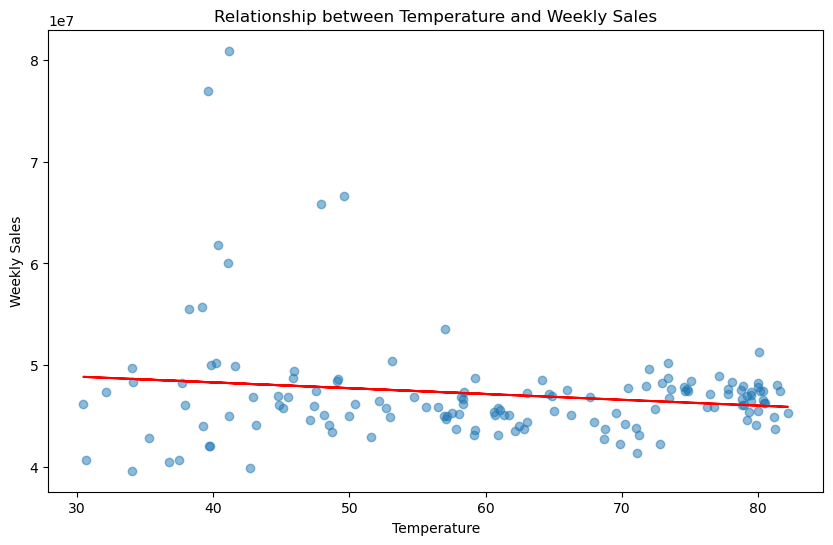

In [40]:
# Visualize the relationship
plt.figure(figsize=(10, 6))
plt.scatter(weekly_data['Temperature'], weekly_data['Weekly_Sales'], alpha=0.5)
plt.plot(weekly_data['Temperature'], model.predict(weekly_data['Temperature']), color='red')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.title('Relationship between Temperature and Weekly Sales')
plt.show()

# d. How is the Consumer Price index affecting the weekly sales of various stores?

In [41]:
sales_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [42]:
# Aggregate data to weekly level, summing sales and averaging CPI
weekly_data = sales_data.groupby(['Store', pd.Grouper(key='Date', freq='W')])[['Weekly_Sales', 'CPI']].agg({'Weekly_Sales': 'sum', 'CPI': 'mean'})


In [43]:
# Reset index to access 'Store' and 'Date' as columns
weekly_data = weekly_data.reset_index()

In [44]:
# Fit a linear regression model with interaction term
model = smf.ols('Weekly_Sales ~ CPI * C(Store)', data=weekly_data).fit()

In [45]:
# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     846.3
Date:                Sat, 12 Apr 2025   Prob (F-statistic):               0.00
Time:                        16:38:17   Log-Likelihood:                -86132.
No. Observations:                6435   AIC:                         1.724e+05
Df Residuals:                    6345   BIC:                         1.731e+05
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.902e+05    6.6

In [47]:
weekly_data

,Store,Date,Weekly_Sales,CPI
0,1,2010-02-07,1643690.90,211.096358
1,1,2010-02-14,1641957.44,211.242170
2,1,2010-02-21,1611968.17,211.289143
3,1,2010-02-28,1409727.59,211.319643
4,1,2010-03-07,1554806.68,211.350143
...,...,...,...,...
6430,45,2012-09-30,713173.95,192.013558
6431,45,2012-10-07,733455.07,192.170412
6432,45,2012-10-14,734464.36,192.327265
6433,45,2012-10-21,718125.53,192.330854


In [53]:
# Visualize the relationship for a few stores
stores_to_plot = [1, 2, 3,11,12,13,21,22,24,33,34,35,40, 41, 42, 43,44, 45]  # Choose some store IDs to visualize

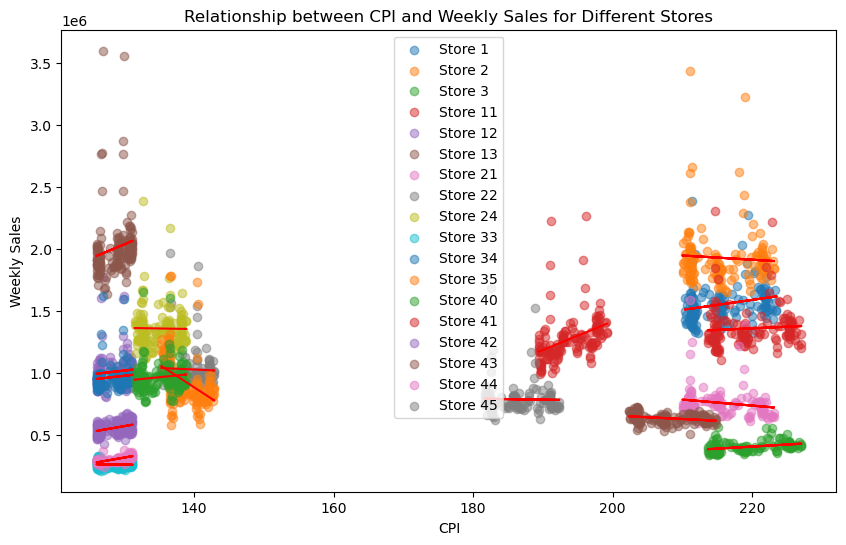

In [54]:
plt.figure(figsize=(10, 6))
for store in stores_to_plot:
    store_data = weekly_data[weekly_data['Store'] == store]
    plt.scatter(store_data['CPI'], store_data['Weekly_Sales'], label=f'Store {store}', alpha=0.5)
    plt.plot(store_data['CPI'], model.predict(store_data), color='red')

plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.title('Relationship between CPI and Weekly Sales for Different Stores')
plt.legend()
plt.show()

# e. Top performing stores according to the historical data.

In [55]:
# Group data by store and sum total weekly sales
store_performance = sales_data.groupby('Store')['Weekly_Sales'].sum()


In [56]:
# Sort stores by total sales in descending order
top_stores = store_performance.sort_values(ascending=False)


In [57]:
# Get the top 10 performing stores
top_10_stores = top_stores.head(10)


In [58]:
# Print the results
print("Top 10 Performing Stores:")
print(top_10_stores)

Top 10 Performing Stores:
Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
10    2.716177e+08
27    2.538559e+08
6     2.237561e+08
1     2.224028e+08
39    2.074455e+08
Name: Weekly_Sales, dtype: float64


In [59]:
top_store_ids = top_10_stores.index.tolist()
print("\nTop Store IDs:", top_store_ids)


Top Store IDs: [20, 4, 14, 13, 2, 10, 27, 6, 1, 39]


# f. The worst performing store, and how significant is the difference between the highest and lowest performing stores.

In [60]:
# Find the worst and highest performing stores
worst_store = store_performance.idxmin()  # Store with minimum total sales
highest_store = store_performance.idxmax()  # Store with maximum total sales

In [61]:
# Calculate the difference in total sales
sales_difference = store_performance[highest_store] - store_performance[worst_store]

# Calculate the percentage difference
percentage_difference = (sales_difference / store_performance[highest_store]) * 100

In [62]:
# Print the results
print(f"Worst Performing Store: {worst_store}")
print(f"Highest Performing Store: {highest_store}")
print(f"Difference in Total Sales: {sales_difference:.2f}")
print(f"Percentage Difference: {percentage_difference:.2f}%")

Worst Performing Store: 33
Highest Performing Store: 20
Difference in Total Sales: 264237570.50
Percentage Difference: 87.67%


# 2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks

In [63]:
from statsmodels.tsa.arima.model import ARIMA
import warnings

In [64]:
# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")


In [65]:
# Function to forecast sales for a given store
def forecast_sales(store_data, weeks=12):
    # Fit ARIMA model to historical data
    model = ARIMA(store_data['Weekly_Sales'], order=(5, 1, 0))  # Adjust order if needed
    model_fit = model.fit()

    # Forecast for the next 12 weeks
    forecast = model_fit.predict(start=len(store_data), end=len(store_data) + weeks - 1)
    return forecast

In [67]:
# Group data by store and date, summing weekly sales
weekly_sales = sales_data.groupby(['Store', pd.Grouper(key='Date', freq='W')])['Weekly_Sales'].sum().reset_index()

In [68]:
# Forecast sales for each store
forecasts = {}
for store in weekly_sales['Store'].unique():
    store_data = weekly_sales[weekly_sales['Store'] == store]
    forecasts[store] = forecast_sales(store_data)

In [69]:
# Print forecasts for each store
for store, forecast in forecasts.items():
    print(f"Store {store} - Forecast for Next 12 Weeks:")
    print(forecast)
    print("\n")

Store 1 - Forecast for Next 12 Weeks:
143    1.565441e+06
144    1.524021e+06
145    1.530963e+06
146    1.530657e+06
147    1.545705e+06
148    1.526392e+06
149    1.534726e+06
150    1.532667e+06
151    1.536849e+06
152    1.530657e+06
153    1.535251e+06
154    1.533146e+06
Name: predicted_mean, dtype: float64


Store 2 - Forecast for Next 12 Weeks:
143    1.899547e+06
144    1.857345e+06
145    1.866606e+06
146    1.864091e+06
147    1.878495e+06
148    1.861834e+06
149    1.869946e+06
150    1.866690e+06
151    1.870910e+06
152    1.865635e+06
153    1.869594e+06
154    1.867425e+06
Name: predicted_mean, dtype: float64


Store 3 - Forecast for Next 12 Weeks:
143    417147.557309
144    407335.611422
145    414480.098633
146    410428.241327
147    414165.516495
148    411217.828563
149    413377.632593
150    411850.794557
151    412860.525720
152    412033.252622
153    412706.883764
154    412219.355460
Name: predicted_mean, dtype: float64


Store 4 - Forecast for Next 12 Weeks: